In [8]:
import pandas as pd

# 1. Coleta e Preparação dos Dados, Organização dos Dados e Limpeza dos Dados.

In [9]:
df_temperatura = pd.read_csv(r'C:\Users\raisapedrotti\OneDrive - falconi365\Documentos\Time_Series_Template\data\raw\temperaturas_limpo.csv', sep= ',')
df_temperatura.head (5)

,Date,Daily minimum temperatures in Melbourne
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [10]:
import pandas as pd

# Função para verificar se uma string é uma data válida no formato YYYY-MM-DD
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, format='%Y-%m-%d', errors='raise')
        return True
    except ValueError:
        return False

# Função para verificar se uma string é uma temperatura válida com uma casa decimal
def is_valid_temperature(temp_str):
    try:
        # Tenta converter o valor para float e verificar se tem uma casa decimal
        temp = float(temp_str)
        return round(temp, 1) == temp
    except ValueError:
        return False

# Ler o arquivo CSV


# Remover colunas indesejadas (ajuste os nomes conforme necessário)
df_temperatura.drop(columns=[' Australia', ' 1981-1990'], inplace=True, errors='ignore')

# Verificar se as colunas esperadas estão presentes
required_columns = ['Date', 'Daily minimum temperatures in Melbourne']
for col in required_columns:
    if col not in df_temperatura.columns:
        raise ValueError(f"A coluna esperada '{col}' não está presente no DataFrame.")

# Identificar valores não padrão na coluna de Data
invalid_dates = df_temperatura[~df_temperatura['Date'].apply(is_valid_date)]

# Identificar valores não padrão na coluna de Temperatura
invalid_temperatures = df_temperatura[~df_temperatura['Daily minimum temperatures in Melbourne'].apply(is_valid_temperature)]

# Exibir resultados
print("Valores com formato de data não padrão:")
print(invalid_dates)

print("\nValores com formato de temperatura não padrão:")
print(invalid_temperatures)


Valores com formato de data não padrão:
Empty DataFrame
Columns: [Date, Daily minimum temperatures in Melbourne]
Index: []

Valores com formato de temperatura não padrão:
Empty DataFrame
Columns: [Date, Daily minimum temperatures in Melbourne]
Index: []


In [11]:
temperatura_inicial= df_temperatura['Daily minimum temperatures in Melbourne'].min()
temperatura_final= df_temperatura['Daily minimum temperatures in Melbourne'].max()

print(f"\nTemperatura Inicial: {temperatura_inicial}")
print(f"Temperatura Final: {temperatura_final}")


Temperatura Inicial: 0.0
Temperatura Final: 26.3


In [12]:
df_temperatura['Daily minimum temperatures in Melbourne'].shape

(3647,)

In [13]:
import pandas as pd

# Função para verificar se uma string é uma data válida no formato YYYY-MM-DD
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, format='%Y-%m-%d', errors='raise')
        return True
    except ValueError:
        return False

# Função para verificar se uma string é uma temperatura válida com uma casa decimal
def is_valid_temperature(temp_str):
    try:
        # Tenta converter o valor para float e verificar se tem uma casa decimal
        temp = float(temp_str)
        return round(temp, 1) == temp
    except ValueError:
        return False

# Ler o arquivo CSV

# Remover colunas indesejadas (ajuste os nomes conforme necessário)
df_temperatura.drop(columns=[' Australia', ' 1981-1990'], inplace=True, errors='ignore')

# Verificar se as colunas esperadas estão presentes
required_columns = ['Date', 'Daily minimum temperatures in Melbourne']
for col in required_columns:
    if col not in df_temperatura.columns:
        raise ValueError(f"A coluna esperada '{col}' não está presente no DataFrame.")

# Filtrar linhas com formatos válidos
df_temperatura_cleaned = df_temperatura[
    df_temperatura['Date'].apply(is_valid_date) &
    df_temperatura['Daily minimum temperatures in Melbourne'].apply(is_valid_temperature)
]

# Salvar o DataFrame limpo em um novo arquivo CSV
df_temperatura_cleaned.to_csv('temperaturas_limpo.csv', index=False)

print("Linhas com formatos válidos foram mantidas e salvas em 'temperaturas_limpo.csv'.")


Linhas com formatos válidos foram mantidas e salvas em 'temperaturas_limpo.csv'.


In [14]:
df_temperatura2 = pd.read_csv('temperaturas_limpo.csv', sep= ',')
df_temperatura2.head (5)

,Date,Daily minimum temperatures in Melbourne
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [15]:
df_temperatura2.columns

Index(['Date', 'Daily minimum temperatures in Melbourne'], dtype='object')

In [16]:
# Encontrar a data inicial e final
data_inicial = df_temperatura2['Date'].min()
data_final = df_temperatura2['Date'].max()

print(f"\nData Inicial: {data_inicial}")
print(f"Data Final: {data_final}")



Data Inicial: 1981-01-01
Data Final: 1990-12-31


In [17]:
# Verificar se as colunas esperadas estão presentes
required_columns = ['Date', 'Daily minimum temperatures in Melbourne']
for col in required_columns:
    if col not in df_temperatura2.columns:
        raise ValueError(f"A coluna esperada '{col}' não está presente no DataFrame.")

# Filtrar linhas com formatos válidos
df_temperatura_cleaned = df_temperatura2[
    df_temperatura2['Date'].apply(is_valid_date) &
    df_temperatura2['Daily minimum temperatures in Melbourne'].apply(is_valid_temperature)
]

# Converter a coluna de temperatura para float para cálculos
df_temperatura_cleaned['Daily minimum temperatures in Melbourne'] = df_temperatura_cleaned['Daily minimum temperatures in Melbourne'].astype(float)

# Encontrar a data inicial e final
data_inicial = df_temperatura_cleaned['Date'].min()
data_final = df_temperatura_cleaned['Date'].max()

# Encontrar as temperaturas correspondentes às datas inicial e final
temperatura_inicial = df_temperatura_cleaned[df_temperatura_cleaned['Date'] == data_inicial]['Daily minimum temperatures in Melbourne'].values[0]
temperatura_final = df_temperatura_cleaned[df_temperatura_cleaned['Date'] == data_final]['Daily minimum temperatures in Melbourne'].values[0]

# Exibir os resultados
print(f"\nData Inicial: {data_inicial}")
print(f"Temperatura na Data Inicial: {temperatura_inicial}")

print(f"\nData Final: {data_final}")
print(f"Temperatura na Data Final: {temperatura_final}")


Data Inicial: 1981-01-01
Temperatura na Data Inicial: 20.7

Data Final: 1990-12-31
Temperatura na Data Final: 13.0


In [18]:
temperatura_inicial= df_temperatura2['Daily minimum temperatures in Melbourne'].min()
temperatura_final= df_temperatura2['Daily minimum temperatures in Melbourne'].max()

print(f"\nTemperatura min da base: {temperatura_inicial}")
print(f"Temperatura max da base: {temperatura_final}")


Temperatura min da base: 0.0
Temperatura max da base: 26.3


In [19]:
df_temperatura2['Daily minimum temperatures in Melbourne'].shape

(3647,)

In [20]:
df_temperatura2.columns

Index(['Date', 'Daily minimum temperatures in Melbourne'], dtype='object')

In [21]:
# Verificar se há valores NaN na coluna 'Daily minimum temperatures in Melbourne'
print(df_temperatura2['Daily minimum temperatures in Melbourne'].isna().sum())

0


In [22]:
print(df_temperatura2['Date'].isna().sum())

0


In [23]:
# Converter a coluna de temperatura para float para cálculos
df_temperatura_cleaned['Daily minimum temperatures in Melbourne'] = df_temperatura_cleaned['Daily minimum temperatures in Melbourne'].astype(float)

# Encontrar a temperatura mínima e máxima
temperatura_inicial = df_temperatura_cleaned['Daily minimum temperatures in Melbourne'].min()
temperatura_final = df_temperatura_cleaned['Daily minimum temperatures in Melbourne'].max()

# Encontrar as datas correspondentes
data_inicial = df_temperatura_cleaned[df_temperatura_cleaned['Daily minimum temperatures in Melbourne'] == temperatura_inicial]['Date'].values
data_final = df_temperatura_cleaned[df_temperatura_cleaned['Daily minimum temperatures in Melbourne'] == temperatura_final]['Date'].values

# Exibir os resultados
print(f"Temperatura Inicial: {temperatura_inicial}")
print(f"Data(s) Correspondente(s) à Temperatura Inicial: {data_inicial}")

print(f"\nTemperatura Final: {temperatura_final}")
print(f"Data(s) Correspondente(s) à Temperatura Final: {data_final}")

Temperatura Inicial: 0.0
Data(s) Correspondente(s) à Temperatura Inicial: ['1982-06-05' '1983-07-24']

Temperatura Final: 26.3
Data(s) Correspondente(s) à Temperatura Final: ['1982-02-15']


# 2. Visualização dos Dados
* 2.1 Gráfico da Série Temporal: Plote os dados ao longo do tempo para identificar padrões visuais como tendências, sazonalidades e ciclos.

* 2.2 Histograma: Pode ser útil para entender a distribuição dos valores da série.

* 2.3 Gráfico de Correlação: Plote autocorrelações para verificar a presença de autocorrelação nos dados.

# 2.1 Gráfico de Série Temporal

Definição:

* Um gráfico de série temporal é um tipo de gráfico que mostra a evolução de uma variável ao longo do tempo. Neste caso, o gráfico plota a temperatura mínima diária ao longo das datas fornecidas.

Características:

* Eixo X: Representa o tempo (datas).
* Eixo Y: Representa os valores da variável (temperatura mínima).

Objetivo: 

* Identificar padrões temporais como tendências (aumento ou diminuição ao longo do tempo), sazonalidades (variações periódicas como    estações do ano) e ciclos (flutuações regulares).

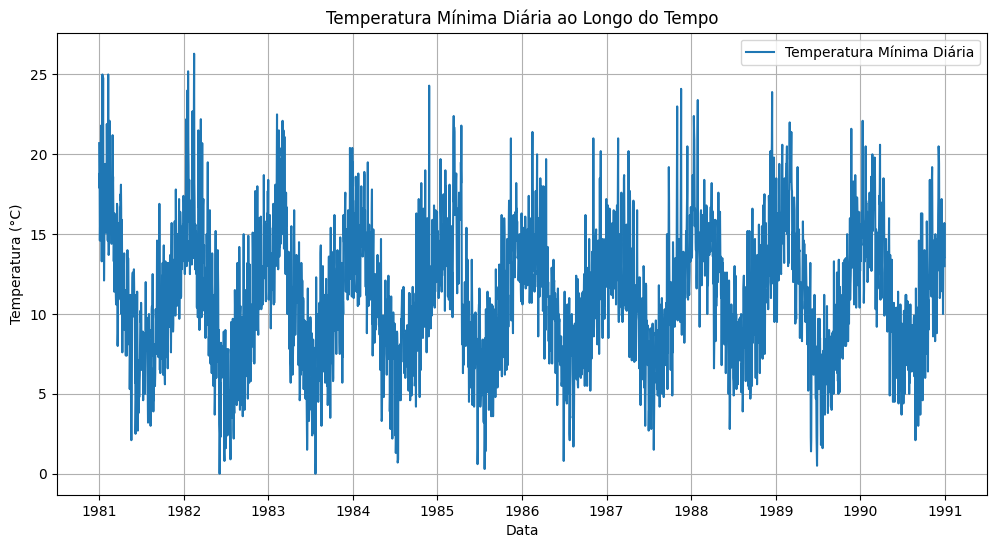

In [24]:
import matplotlib.pyplot as plt

file_path = 'temperaturas_limpo.csv'
try:
    # Ler o arquivo CSV
    df_temperatura2 = pd.read_csv(file_path, sep=',')
    
    # Garantir que a coluna 'Date' esteja no formato de data
    df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
    
    # Definir a coluna 'Date' como índice
    df_temperatura2.set_index('Date', inplace=True)
    
    # Plotar a série temporal
    plt.figure(figsize=(12, 6))
    plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária')
    plt.title('Temperatura Mínima Diária ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Erro ao processar o arquivo CSV: {e}")


# 2.2 Histograma

Definição:

* Um histograma é um gráfico de barras que mostra a distribuição de uma variável contínua. Ele exibe a frequência com que diferentes intervalos de valores ocorrem.

Características:

* Eixo X: Representa intervalos de valores (bins) da variável.
* Eixo Y: Representa a frequência ou contagem de ocorrências em cada intervalo.

Objetivo:

* Entender a distribuição dos dados, como a frequência das diferentes faixas de temperatura. É útil para ver a densidade e a forma da distribuição dos valores.

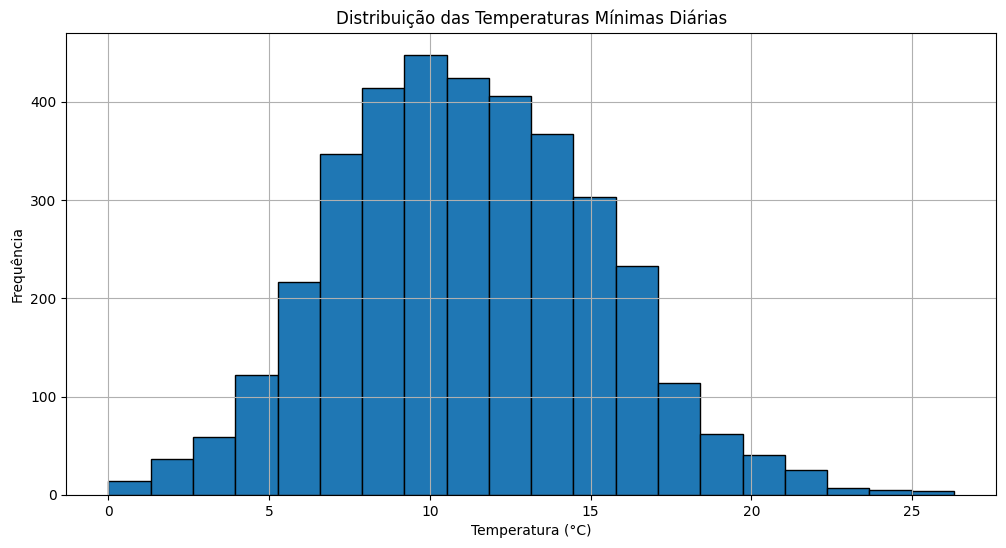

In [25]:
plt.figure(figsize=(12, 6))
plt.hist(df_temperatura2['Daily minimum temperatures in Melbourne'], bins=20, edgecolor='black')
plt.title('Distribuição das Temperaturas Mínimas Diárias')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 2.3 Gráfico de Correlação (ou Autocorrelação)

Definição:

* Um gráfico de correlação, como o gráfico de autocorrelação, mostra a correlação entre os valores da série temporal e seus próprios valores defasados no tempo.

Características:

* Eixo X: Representa os defasamentos ou lags.
* Eixo Y: Representa o coeficiente de autocorrelação.

Objetivo:

* Verificar a presença de autocorrelação nos dados, ou seja, a relação entre valores em diferentes pontos no tempo. Ajuda a identificar padrões cíclicos ou a necessidade de modelagem temporal, como ARIMA.

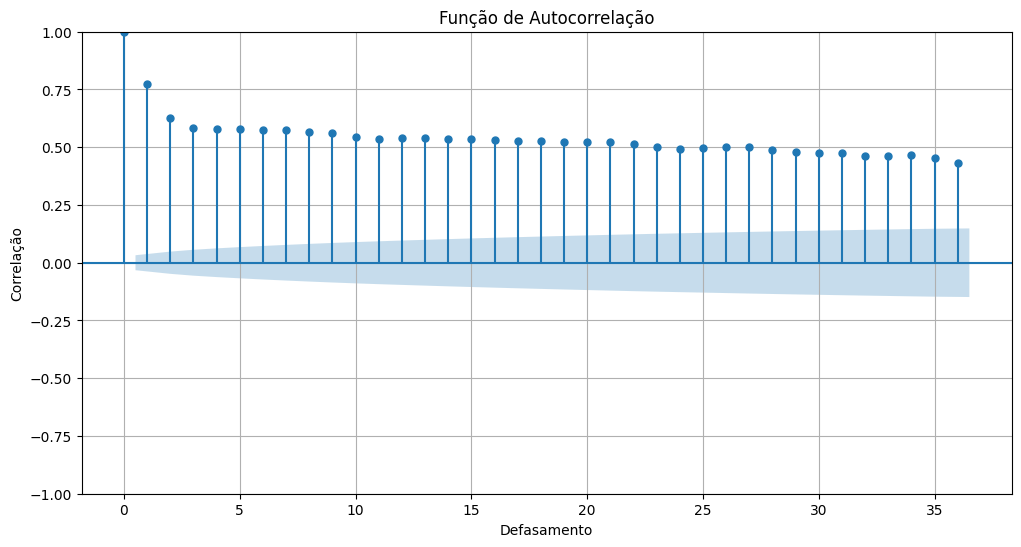

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

# Plotar a autocorrelação
plt.figure(figsize=(12, 6))
plot_acf(df_temperatura2['Daily minimum temperatures in Melbourne'], ax=plt.gca())
plt.title('Função de Autocorrelação')
plt.xlabel('Defasamento')
plt.ylabel('Correlação')
plt.grid(True)
plt.show()


# 3. Decomposição da Série Temporal

* ### 3.1 Tendência: Identifique a tendência geral dos dados ao longo do tempo. Isso pode ser feito através de métodos de suavização como médias móveis.

   - 3.1.1 Média Móvel Simples (SMA): Suaviza dados usando uma média de valores em uma janela fixa. Simples e eficaz para dados com variações regulares.

    - 3.1.2 Média Móvel Ponderada (WMA): Similar ao SMA, mas com pesos diferentes para observações. Mais flexível para enfatizar dados recentes.

    - 3.1.3 Suavização Exponencial Simples (SES): Atribui pesos exponenciais decrescentes para suavizar a série temporal, útil para dados sem tendência.

    - 3.1.4 Suavização Exponencial Dupla: Ajusta para séries temporais com tendência, combinando suavização de nível e tendência.

    - 3.1.5 Regressão Linear: Ajusta uma linha reta aos dados, útil para identificar e prever tendências lineares.
    
* ### 3.2 Sazonalidade: Identifique padrões sazonais que ocorrem em intervalos regulares, como variações anuais ou mensais.

* ### 3.3 Ciclos: Identifique ciclos que não são sazonais, como variações econômicas ou de negócios que ocorrem com frequência irregular.

* ### 3.4 Ruído: A parte restante dos dados que não pode ser explicada por tendência, sazonalidade ou ciclos é o ruído.

# 3.1 Tendência: 

Definição:

* Tendência é o padrão geral de longo prazo nos dados. Ela pode ser uma direção ascendente, descendente ou constante. A tendência é o comportamento médio dos dados ao longo de um período prolongado.

Características:

* Representa o padrão de crescimento ou declínio de longo prazo.
* Pode ser crescente, decrescente ou estável.
* Não é influenciada por variações de curto prazo ou flutuações sazonais.

Objetivo:

* Identificar a direção geral dos dados.
* Auxiliar em previsões de longo prazo e planejamento estratégico.

# 3.1.1 Média Móvel Simples

Definição:

* A média móvel simples (SMA) suaviza os dados calculando a média dos valores em uma janela de tempo fixa. É uma maneira fácil de identificar tendências a partir de flutuações diárias ou semanais.

Características:

* Suaviza os dados removendo variações de curto prazo.
* Pode ser calculada para diferentes tamanhos de janela (e.g., 7 dias, 30 dias).

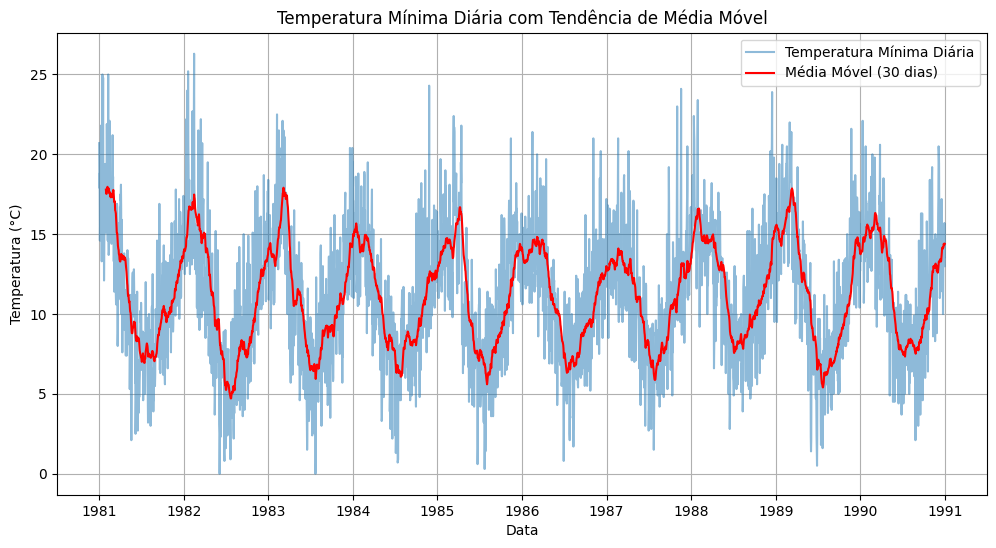

In [27]:
import matplotlib.pyplot as plt

file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
df_temperatura2.set_index('Date', inplace=True)

# Calcular a média móvel
df_temperatura2['Média Móvel'] = df_temperatura2['Daily minimum temperatures in Melbourne'].rolling(window=30).mean()

# Plotar dados e tendência
plt.figure(figsize=(12, 6))
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Média Móvel'], label='Média Móvel (30 dias)', color='red')
plt.title('Temperatura Mínima Diária com Tendência de Média Móvel')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


# 3.1.2 Média Móvel Ponderada

Definição:

* A média móvel ponderada (WMA) atribui pesos diferentes a diferentes observações dentro da janela de tempo. Observações mais recentes geralmente recebem um peso maior.

Características:

* Oferece mais flexibilidade do que a média móvel simples.
* Permite ajustar a importância de observações mais recentes.

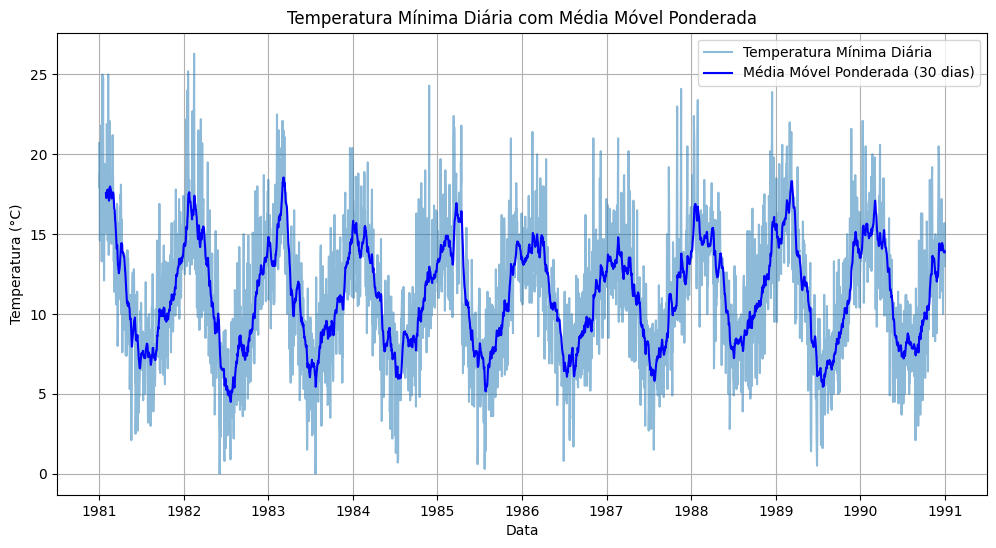

In [28]:
import numpy as np

# Função para calcular a média móvel ponderada
def weighted_moving_average(series, window_size):
    weights = np.arange(1, window_size + 1)
    return series.rolling(window=window_size).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Calcular a média móvel ponderada
window_size = 30
df_temperatura2['Média Móvel Ponderada'] = weighted_moving_average(df_temperatura2['Daily minimum temperatures in Melbourne'], window_size)

# Plotar os dados e a média móvel ponderada
plt.figure(figsize=(12, 6))
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Média Móvel Ponderada'], label=f'Média Móvel Ponderada ({window_size} dias)', color='blue')
plt.title('Temperatura Mínima Diária com Média Móvel Ponderada')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


# 3.1.3 Suavização Exponencial Simples (SES)

Definição:

* A suavização exponencial simples atribui pesos exponenciais decrescentes aos valores passados. Valores mais recentes têm mais peso na média.

Características:

* Reage rapidamente a mudanças recentes.
* Simples e eficaz para dados com pouca sazonalidade ou tendência.

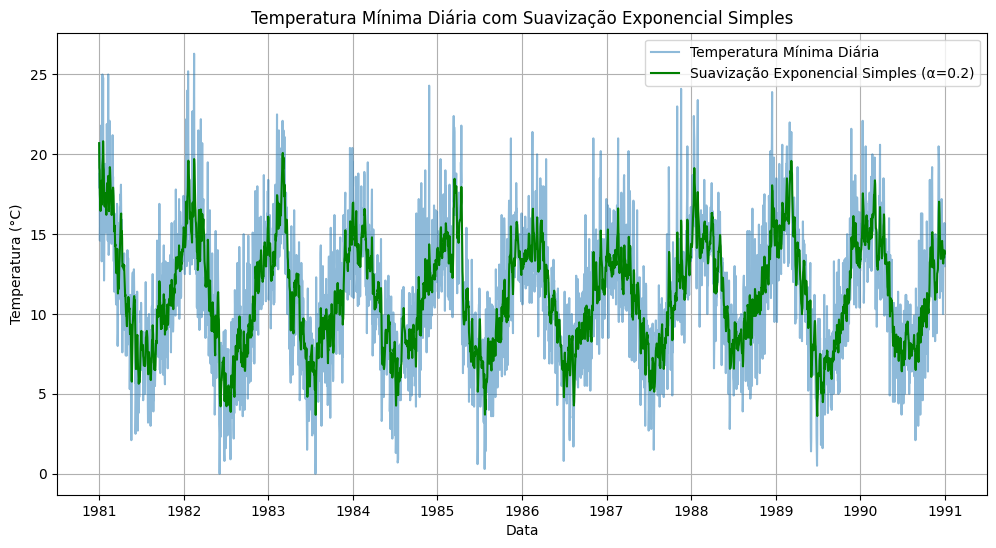

In [29]:
# Calcular a suavização exponencial simples
alpha = 0.2
df_temperatura2['Suavização Exponencial Simples'] = df_temperatura2['Daily minimum temperatures in Melbourne'].ewm(alpha=alpha).mean()

# Plotar os dados e a suavização exponencial simples
plt.figure(figsize=(12, 6))
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Suavização Exponencial Simples'], label=f'Suavização Exponencial Simples (α={alpha})', color='green')
plt.title('Temperatura Mínima Diária com Suavização Exponencial Simples')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 3.1.4. Suavização Exponencial Dupla

Definição:

* A suavização exponencial dupla é usada para séries temporais com tendência. Ela suaviza tanto a série temporal quanto a tendência.

Características:

* Lida com séries temporais que mostram tendência.
* Requer dois parâmetros de suavização: um para a série temporal e outro para a tendência.

Número de valores NaN antes do tratamento: 0
Número de valores NaN após o tratamento: 0


C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


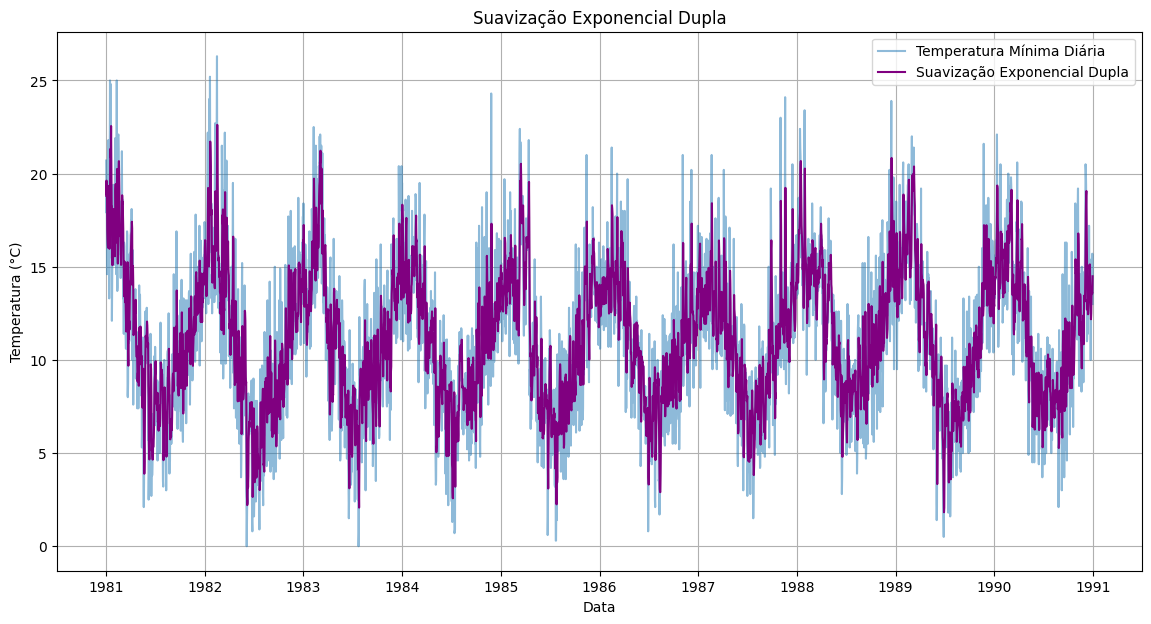

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

# Ler o arquivo CSV
file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')

# Garantir que a coluna 'Date' esteja no formato de data
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])

# Definir a coluna 'Date' como índice
df_temperatura2.set_index('Date', inplace=True)

# Verificar e remover valores NaN
print("Número de valores NaN antes do tratamento:", df_temperatura2['Daily minimum temperatures in Melbourne'].isna().sum())
df_temperatura2 = df_temperatura2.dropna(subset=['Daily minimum temperatures in Melbourne'])
print("Número de valores NaN após o tratamento:", df_temperatura2['Daily minimum temperatures in Melbourne'].isna().sum())

# Suavização Exponencial Dupla
model = ExponentialSmoothing(df_temperatura2['Daily minimum temperatures in Melbourne'], trend='add', seasonal=None)
fit = model.fit()
df_temperatura2['Suavização Exponencial Dupla'] = fit.fittedvalues

# Plotar os resultados
plt.figure(figsize=(14, 7))

# Plot da série original e da suavização exponencial dupla
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Suavização Exponencial Dupla'], label='Suavização Exponencial Dupla', color='purple')

plt.title('Suavização Exponencial Dupla')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

# 3.1.5 Regressão Linear

Definição:

* A regressão linear ajusta uma linha aos dados para identificar a tendência. É uma abordagem comum para modelar e prever séries temporais com tendência linear.

Características:

* Fornece uma visão clara da tendência linear.
* Requer modelagem adicional para lidar com sazonalidade e ciclos.

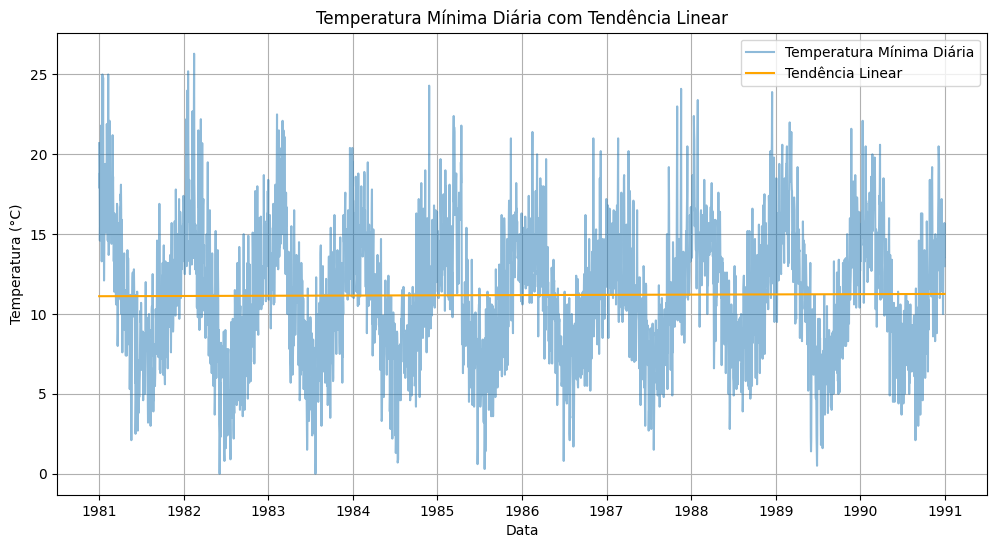

In [31]:
from sklearn.linear_model import LinearRegression

# Criar variável de tempo
df_temperatura2['Dias'] = (df_temperatura2.index - df_temperatura2.index[0]).days

# Ajustar o modelo de regressão linear
X = df_temperatura2[['Dias']]
y = df_temperatura2['Daily minimum temperatures in Melbourne']
model = LinearRegression().fit(X, y)
df_temperatura2['Tendência Linear'] = model.predict(X)

# Plotar os dados e a tendência linear
plt.figure(figsize=(12, 6))
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Tendência Linear'], label='Tendência Linear', color='orange')
plt.title('Temperatura Mínima Diária com Tendência Linear')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


# Título: Análise e Visualização de Série Temporal de Temperaturas Mínimas
Descrição:

* Este código realiza uma análise detalhada de uma série temporal contendo temperaturas mínimas diárias. As principais etapas incluem:

Carregamento e Preparação dos Dados:

 - Importação das Bibliotecas: Importa as bibliotecas necessárias, incluindo pandas para manipulação de dados, numpy para operações numéricas, matplotlib para visualização, e statsmodels para análise de séries temporais.

* Carregamento do CSV: Lê o arquivo CSV contendo dados de temperatura mínima.

* Conversão de Datas: Converte a coluna de datas para o formato de data e define essa coluna como o índice do DataFrame.

* Tratamento de Valores Ausentes: Identifica e remove quaisquer valores ausentes na coluna de temperaturas.

Análise de Tendência:

* Suavização Exponencial Dupla: Aplica o modelo de suavização exponencial dupla para identificar e visualizar a tendência geral dos dados. A suavização exponencial ajuda a entender a tendência subjacente, eliminando variações sazonais e ruído.

Visualização:

* Plotagem da Suavização Exponencial Dupla: Cria um gráfico que mostra as temperaturas mínimas diárias junto com a série suavizada pela suavização exponencial dupla. Este gráfico facilita a visualização da tendência ao longo do tempo.

Número de valores NaN antes do tratamento: 5
Número de valores NaN após o tratamento: 0


C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


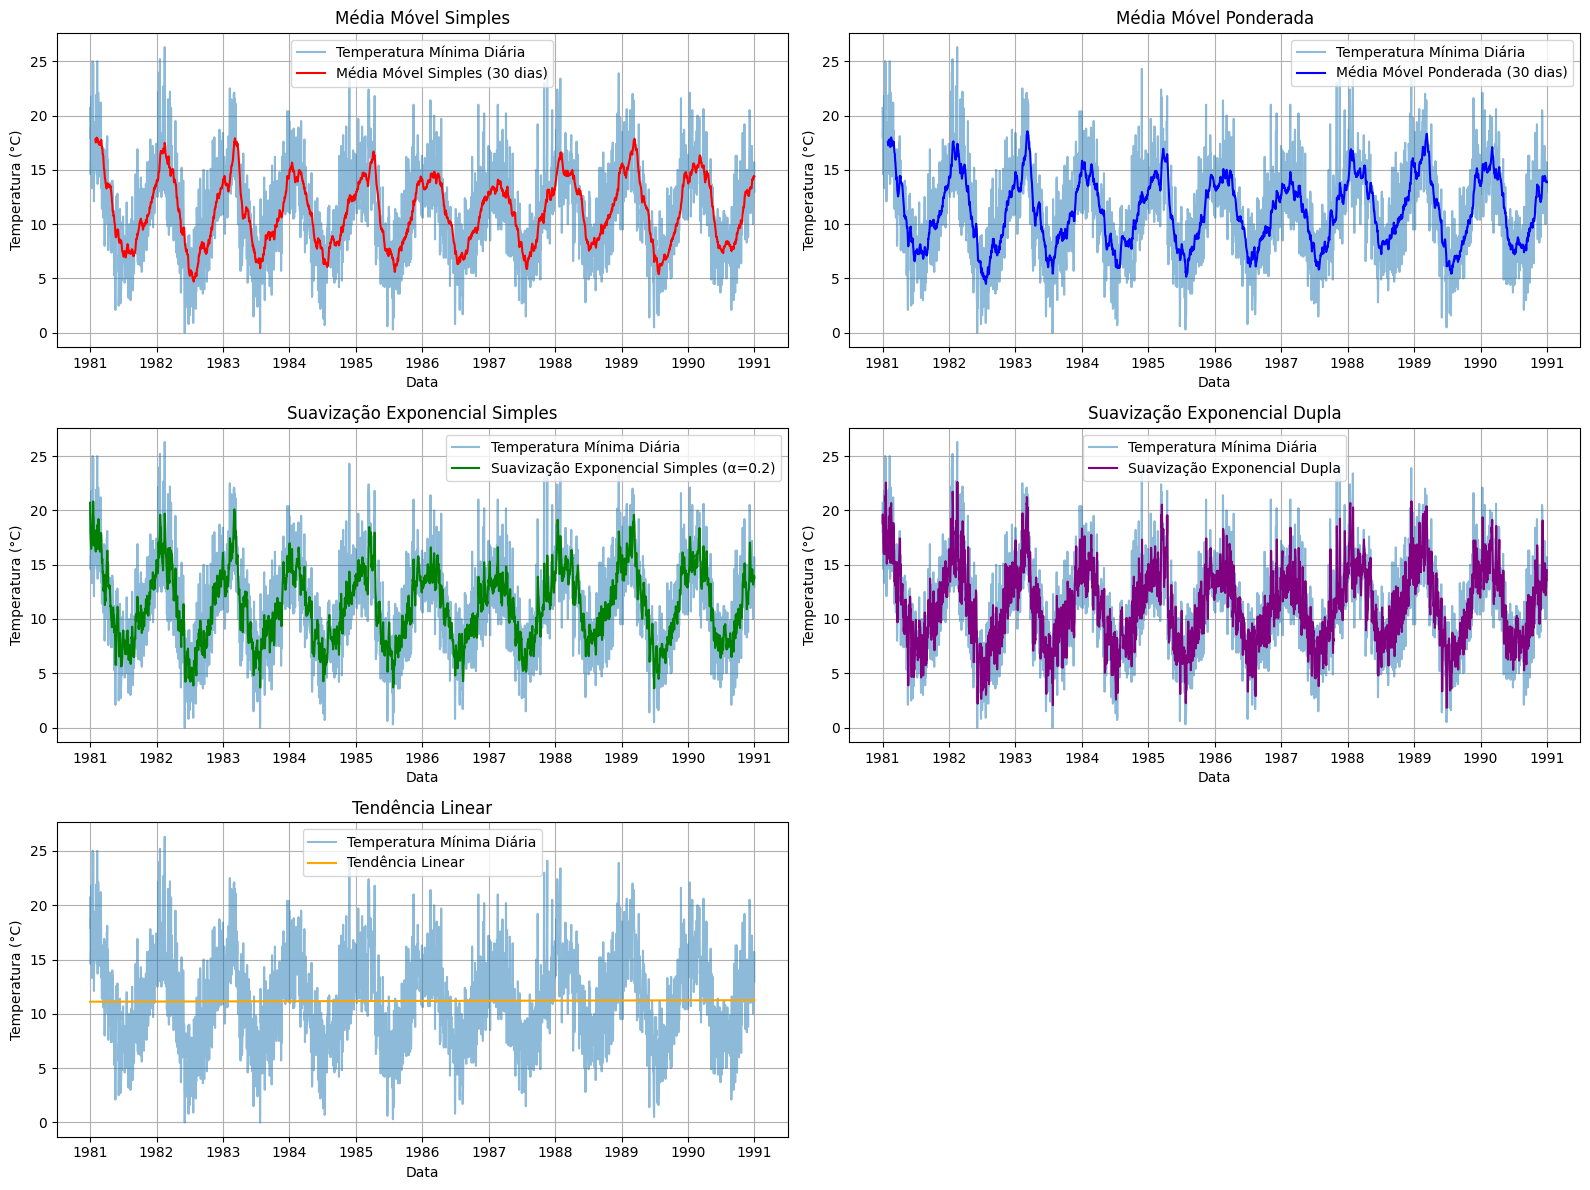

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Carregar o DataFrame
file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')

# Converter a coluna 'Date' para o formato de data e definir como índice
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
df_temperatura2.set_index('Date', inplace=True)

# Definir a frequência do índice de datas, por exemplo, diária ('D')
df_temperatura2 = df_temperatura2.asfreq('D')

# Identificar e tratar valores NaN
print("Número de valores NaN antes do tratamento:", df_temperatura2['Daily minimum temperatures in Melbourne'].isna().sum())
df_temperatura2 = df_temperatura2.dropna(subset=['Daily minimum temperatures in Melbourne'])
print("Número de valores NaN após o tratamento:", df_temperatura2['Daily minimum temperatures in Melbourne'].isna().sum())

# Adicionar coluna de dias desde o início
df_temperatura2['Dias'] = (df_temperatura2.index - df_temperatura2.index[0]).days

# 1. Média Móvel Simples
window_size = 30
df_temperatura2['Média Móvel Simples'] = df_temperatura2['Daily minimum temperatures in Melbourne'].rolling(window=window_size).mean()

# 2. Média Móvel Ponderada
def weighted_moving_average(series, window_size):
    weights = np.arange(1, window_size + 1)
    return series.rolling(window=window_size).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

df_temperatura2['Média Móvel Ponderada'] = weighted_moving_average(df_temperatura2['Daily minimum temperatures in Melbourne'], window_size)

# 3. Suavização Exponencial Simples (SES)
alpha = 0.2
df_temperatura2['Suavização Exponencial Simples'] = df_temperatura2['Daily minimum temperatures in Melbourne'].ewm(alpha=alpha).mean()

# 4. Suavização Exponencial Dupla
model = sm.tsa.ExponentialSmoothing(df_temperatura2['Daily minimum temperatures in Melbourne'], trend='add', seasonal=None)
fit = model.fit()
df_temperatura2['Suavização Exponencial Dupla'] = fit.fittedvalues

# 5. Regressão Linear
X = df_temperatura2[['Dias']]
y = df_temperatura2['Daily minimum temperatures in Melbourne']
model_lr = LinearRegression().fit(X, y)
df_temperatura2['Tendência Linear'] = model_lr.predict(X)

# Plotar os resultados
plt.figure(figsize=(16, 12))

# Gráfico de Média Móvel Simples
plt.subplot(3, 2, 1)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Média Móvel Simples'], label=f'Média Móvel Simples ({window_size} dias)', color='red')
plt.title('Média Móvel Simples')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Gráfico de Média Móvel Ponderada
plt.subplot(3, 2, 2)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Média Móvel Ponderada'], label=f'Média Móvel Ponderada ({window_size} dias)', color='blue')
plt.title('Média Móvel Ponderada')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Gráfico de Suavização Exponencial Simples
plt.subplot(3, 2, 3)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Suavização Exponencial Simples'], label=f'Suavização Exponencial Simples (α={alpha})', color='green')
plt.title('Suavização Exponencial Simples')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Gráfico de Suavização Exponencial Dupla
plt.subplot(3, 2, 4)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Suavização Exponencial Dupla'], label='Suavização Exponencial Dupla', color='purple')
plt.title('Suavização Exponencial Dupla')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Gráfico de Regressão Linear
plt.subplot(3, 2, 5)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, df_temperatura2['Tendência Linear'], label='Tendência Linear', color='orange')
plt.title('Tendência Linear')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 3.2. Sazonalidade

Definição:

* A sazonalidade é o componente de uma série temporal que captura padrões que se repetem em intervalos regulares e previsíveis, como variações que ocorrem em determinadas estações do ano ou meses.

Características:

* Reflete padrões repetitivos ou cíclicos dentro de um intervalo fixo de tempo.
* Pode ocorrer diariamente, mensalmente, anualmente, etc.
* Geralmente é identificado através da decomposição da série temporal ou análise de frequências.

Objetivo:
* O objetivo é identificar e visualizar padrões que ocorrem com uma periodicidade regular. Em uma série temporal de temperaturas, isso pode mostrar como as temperaturas variam sazonalmente ao longo das estações.

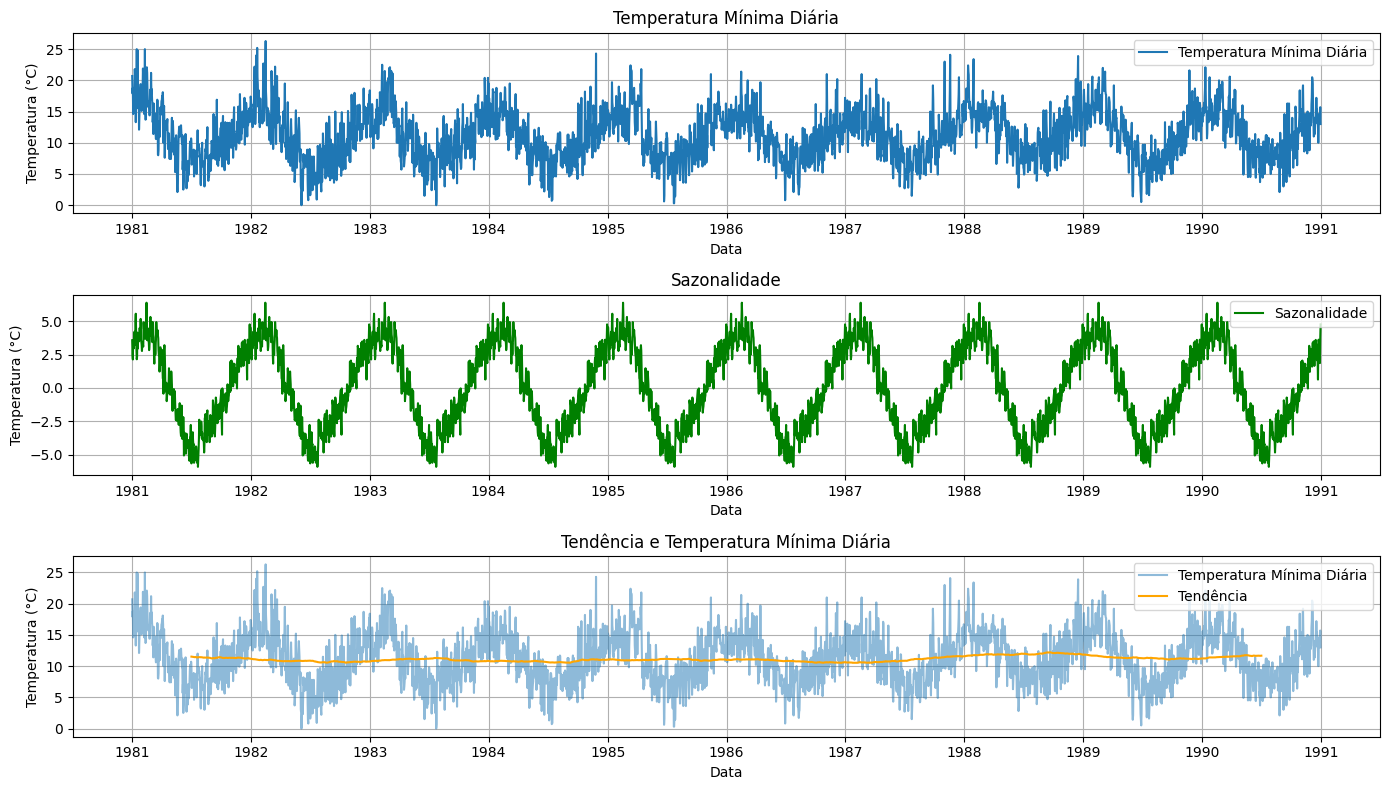

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Leitura e preparação dos dados
file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
df_temperatura2.set_index('Date', inplace=True)

# Remover valores NaN
df_temperatura2 = df_temperatura2.dropna(subset=['Daily minimum temperatures in Melbourne'])

# Decomposição da Série Temporal
# Ajuste o parâmetro period para a periodicidade dos dados. Por exemplo, 365 para dados diários ao longo de um ano.
period = 365  # Ajuste conforme a periodicidade dos dados

# Decomposição
decomposition = sm.tsa.seasonal_decompose(df_temperatura2['Daily minimum temperatures in Melbourne'], model='add', period=period)

# Adicionar o componente de sazonalidade ao DataFrame
df_temperatura2['Sazonalidade'] = decomposition.seasonal

# Plotar os componentes da decomposição
plt.figure(figsize=(14, 8))

# Plotar a série original
plt.subplot(3, 1, 1)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária')
plt.title('Temperatura Mínima Diária')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Plotar a sazonalidade
plt.subplot(3, 1, 2)
plt.plot(df_temperatura2.index, df_temperatura2['Sazonalidade'], label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

# Plotar a tendência e o ruído (opcional, para referência)
plt.subplot(3, 1, 3)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária', alpha=0.5)
plt.plot(df_temperatura2.index, decomposition.trend, label='Tendência', color='orange')
plt.title('Tendência e Temperatura Mínima Diária')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


* Observado: Mostra a série temporal original.
* Tendência: Mostra a direção geral da série ao longo do tempo.
* Sazonalidade: Mostra padrões que se repetem em intervalos fixos.
* Ruído: Mostra variações que não são explicadas por tendência ou sazonalidade.

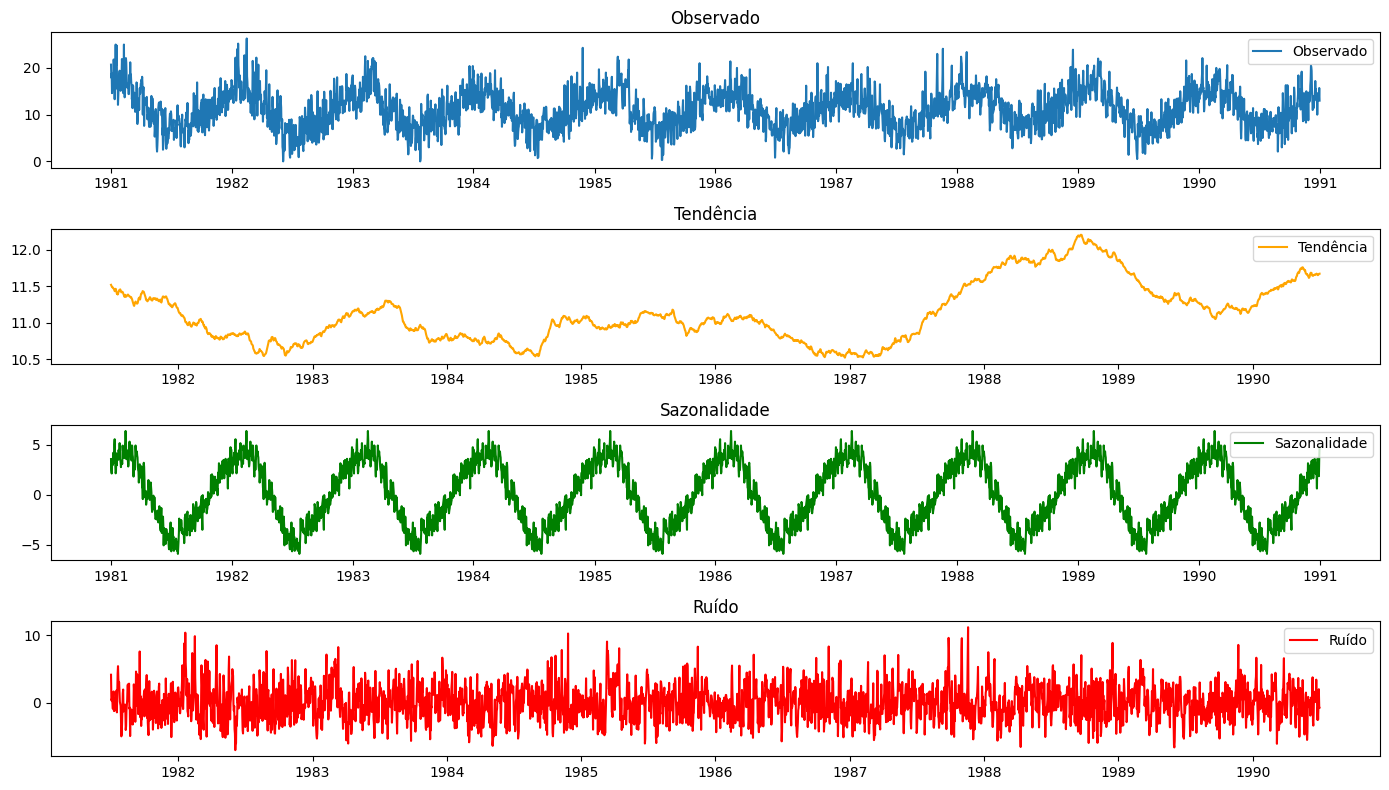

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregar o DataFrame
file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')

# Converter a coluna 'Date' para o formato de data e definir como índice
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
df_temperatura2.set_index('Date', inplace=True)

# Definir a frequência do índice de datas, por exemplo, diária ('D')
df_temperatura2 = df_temperatura2.asfreq('D')

# Identificar e tratar valores NaN
df_temperatura2 = df_temperatura2.dropna(subset=['Daily minimum temperatures in Melbourne'])

# Decomposição da Série Temporal
# 'period=365' para dados diários com sazonalidade anual
decomposition = seasonal_decompose(df_temperatura2['Daily minimum temperatures in Melbourne'], model='add', period=365)

# Plotar os componentes da decomposição
plt.figure(figsize=(14, 8))

# Observado
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observado')
plt.title('Observado')
plt.legend()

# Tendência
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendência', color='orange')
plt.title('Tendência')
plt.legend()

# Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.legend()

# Ruído
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Ruído', color='red')
plt.title('Ruído')
plt.legend()

plt.tight_layout()
plt.show()


# 3.3. Ciclos

Definição:

* Ciclos referem-se a variações que ocorrem com frequência irregular e são diferentes da sazonalidade. Eles são frequentemente associados a mudanças econômicas, políticas ou outras condições que afetam a série temporal de maneira não periódica.

Características:

* Não seguem um padrão de repetição regular.
* A frequência e a duração dos ciclos podem variar amplamente.
* São mais difíceis de prever e identificar do que a sazonalidade.

Objetivo:

* O objetivo é identificar padrões de variação que não são sazonais, mas que ocorrem ao longo de períodos mais longos e irregulares.

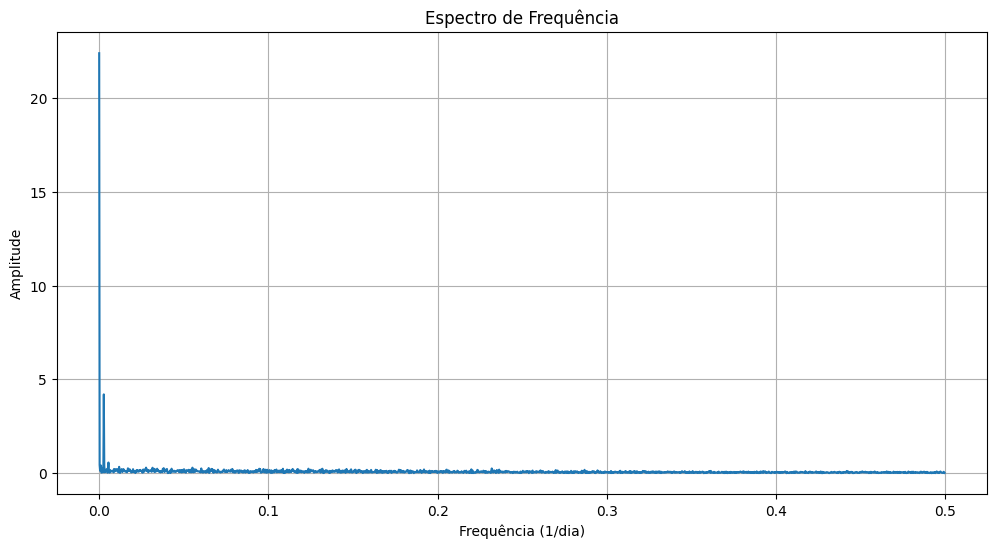

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Leitura e preparação dos dados
file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
df_temperatura2.set_index('Date', inplace=True)

# Remover valores NaN
df_temperatura2 = df_temperatura2.dropna(subset=['Daily minimum temperatures in Melbourne'])

# Obter os dados
temperaturas = df_temperatura2['Daily minimum temperatures in Melbourne'].values

# Número de pontos de dados e a frequência
n = len(temperaturas)
T = 1  # Supondo frequência diária

# Aplicar a Transformada Rápida de Fourier (FFT)
yf = fft(temperaturas)
xf = fftfreq(n, T)[:n//2]

# Plotar o espectro de frequência
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
plt.title('Espectro de Frequência')
plt.xlabel('Frequência (1/dia)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# 3.4. Ruído

Definição:

* Ruído é o componente da série temporal que representa a variação aleatória e irregular que não pode ser explicada pela tendência, sazonalidade ou ciclos. É essencialmente o "erro" ou a parte imprevisível da série.

Características:

* Representa variações não sistemáticas e imprevisíveis.
* Pode ser causado por eventos aleatórios ou erros de medição.
*É a parte residual após a remoção de tendência, sazonalidade e ciclos.

Objetivo:

* O objetivo é identificar e analisar a variação residual para entender o que não é explicado pelos componentes identificáveis.

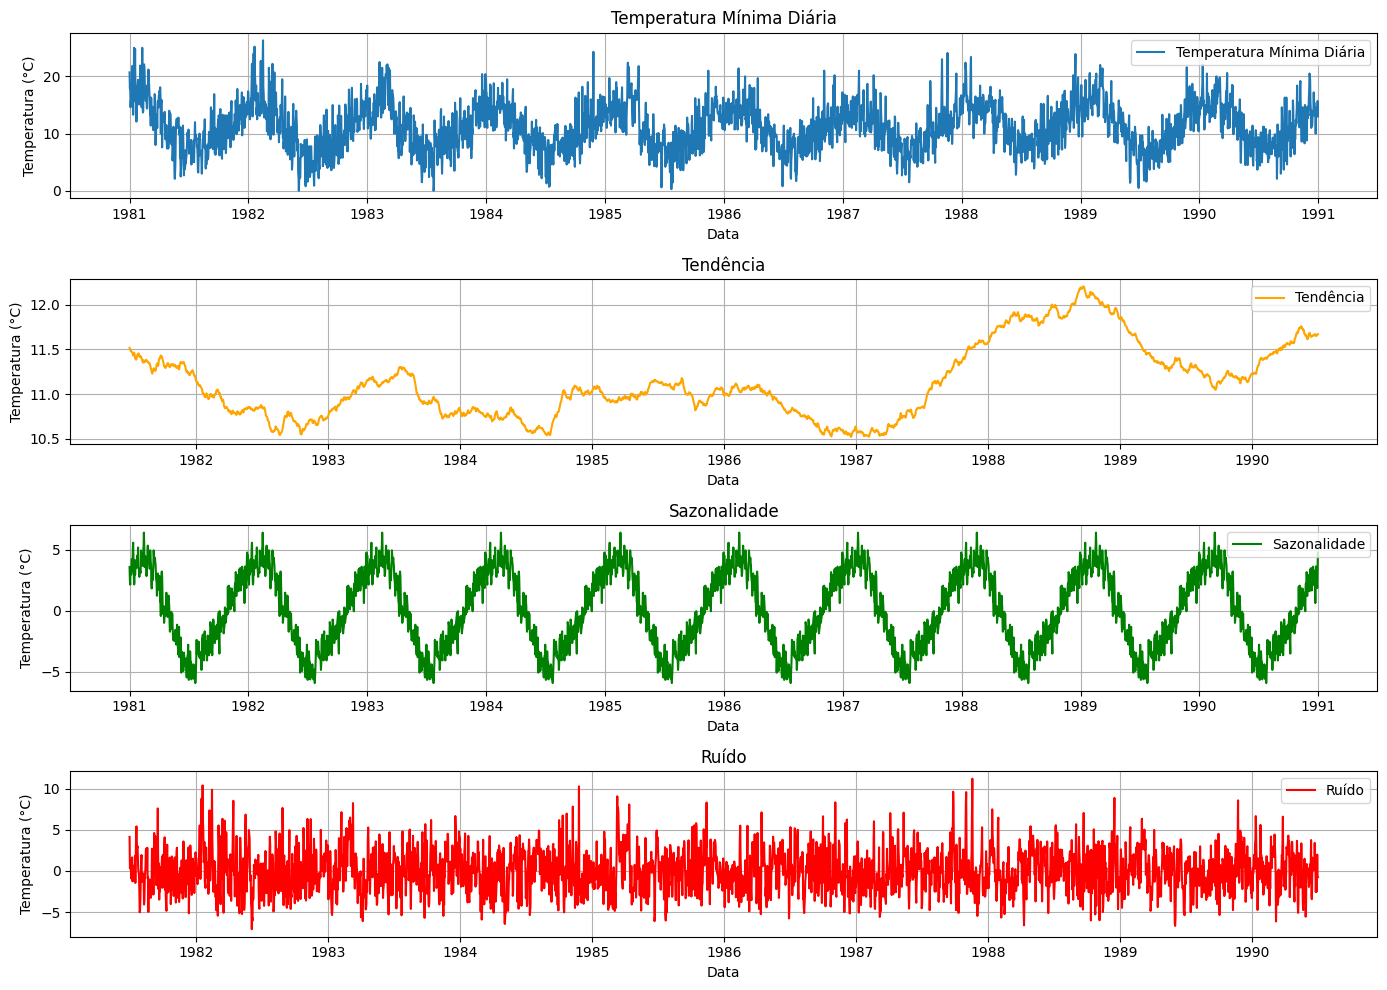

In [36]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Leitura e preparação dos dados
file_path = 'temperaturas_limpo.csv'
df_temperatura2 = pd.read_csv(file_path, sep=',')
df_temperatura2['Date'] = pd.to_datetime(df_temperatura2['Date'])
df_temperatura2.set_index('Date', inplace=True)

# Remover valores NaN
df_temperatura2 = df_temperatura2.dropna(subset=['Daily minimum temperatures in Melbourne'])

# Decomposição da Série Temporal
# O parâmetro period deve ser ajustado conforme a periodicidade da série (por exemplo, 365 para dados anuais)
period = 365  # Ajuste conforme a periodicidade dos dados

# Decomposição
decomposition = sm.tsa.seasonal_decompose(df_temperatura2['Daily minimum temperatures in Melbourne'], model='add', period=period)

# Adicionando os componentes de decomposição ao DataFrame
df_temperatura2['Tendência'] = decomposition.trend
df_temperatura2['Sazonalidade'] = decomposition.seasonal
df_temperatura2['Ruído'] = df_temperatura2['Daily minimum temperatures in Melbourne'] - df_temperatura2['Tendência'] - df_temperatura2['Sazonalidade']

# Plotando os componentes da decomposição
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df_temperatura2.index, df_temperatura2['Daily minimum temperatures in Melbourne'], label='Temperatura Mínima Diária')
plt.title('Temperatura Mínima Diária')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(df_temperatura2.index, df_temperatura2['Tendência'], label='Tendência', color='orange')
plt.title('Tendência')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(df_temperatura2.index, df_temperatura2['Sazonalidade'], label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(df_temperatura2.index, df_temperatura2['Ruído'], label='Ruído', color='red')
plt.title('Ruído')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 4. Modelagem da Série Temporal

In [37]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Certifique-se de que a coluna 'Date' está no formato datetime
df_temperatura_cleaned['Date'] = pd.to_datetime(df_temperatura_cleaned['Date'])

# Definir a coluna 'Date' como índice
df_temperatura_cleaned.set_index('Date', inplace=True)

# Ordenar o DataFrame por data (opcional, mas recomendável)
df_temperatura_cleaned.sort_index(inplace=True)


# Visualização e Análise Inicial

* Antes de ajustar os modelos, visualize a série temporal e verifique a estacionaridade.

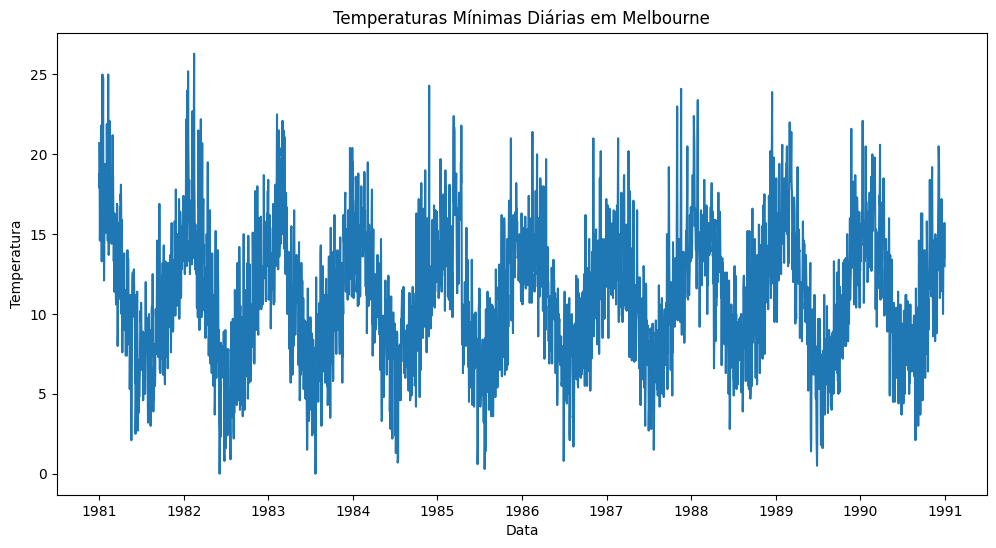

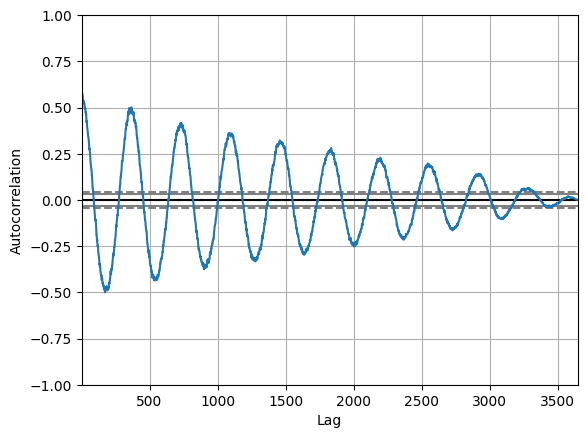

Teste Dickey-Fuller:
Estatística do Teste: -4.444652847181705
Valor-p: 0.0002472372465853492


In [38]:
# Plotar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(df_temperatura_cleaned['Daily minimum temperatures in Melbourne'])
plt.title('Temperaturas Mínimas Diárias em Melbourne')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.show()

# Plotar a autocorrelação
autocorrelation_plot(df_temperatura_cleaned['Daily minimum temperatures in Melbourne'])
plt.show()

# Verificar estacionaridade com o teste Dickey-Fuller
result = adfuller(df_temperatura_cleaned['Daily minimum temperatures in Melbourne'])
print('Teste Dickey-Fuller:')
print(f'Estatística do Teste: {result[0]}')
print(f'Valor-p: {result[1]}')


# Conclusão com Base nos Resultados

* Valor-p < 0.05: Com um valor-p de 0.0002472372465853515, que é muito menor que 0.05, você pode rejeitar a hipótese nula de que a série tem uma raiz unitária. Isso indica que há uma evidência significativa de que a série temporal é estacionária.

* Estatística do Teste: A estatística do teste de -4.444652847181702 é muito negativa, o que também apoia a conclusão de que a série é estacionária.

# 4.1 Aplicar ARIMA

* ARIMA é usado quando a série temporal não tem sazonalidade ou quando você está modelando apenas componentes não sazonais.

C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so 

                                          SARIMAX Results                                          
Dep. Variable:     Daily minimum temperatures in Melbourne   No. Observations:                 3647
Model:                                      ARIMA(5, 0, 0)   Log Likelihood               -8468.966
Date:                                     Mon, 22 Jul 2024   AIC                          16951.933
Time:                                             16:17:00   BIC                          16995.345
Sample:                                                  0   HQIC                         16967.394
                                                    - 3647                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2254      0.331     33.92

C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


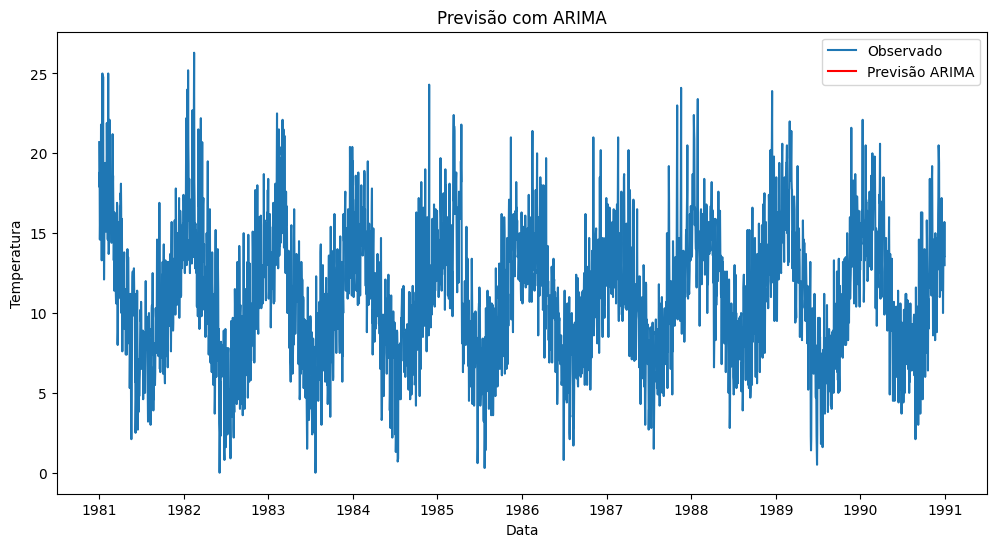

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ajuste do modelo ARIMA
arima_model = ARIMA(df_temperatura_cleaned['Daily minimum temperatures in Melbourne'], order=(5,0,0))  # p, d, q
arima_fit = arima_model.fit()

# Resumo do modelo ARIMA
print(arima_fit.summary())

# Previsão
forecast_arima = arima_fit.get_forecast(steps=30)
forecast_arima_index = pd.date_range(start=df_temperatura_cleaned.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_arima_df = pd.DataFrame(forecast_arima.predicted_mean, index=forecast_arima_index, columns=['Forecast'])

plt.figure(figsize=(12, 6))
plt.plot(df_temperatura_cleaned['Daily minimum temperatures in Melbourne'], label='Observado')
plt.plot(forecast_arima_df, label='Previsão ARIMA', color='red')
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


# Análise dos Resultados do Modelo ARIMA

* Resumo dos Resultados do Modelo ARIMA:

* Coeficientes do Modelo:

        const: 11.2254 (intercepto)
        ar.L1 a ar.L5: Coeficientes para os termos autoregressivos (AR)
        sigma2: Variância dos erros

* Estatísticas:

        Log Likelihood: -8468.966
        AIC (Critério de Informação de Akaike): 16951.933
        BIC (Critério de Informação Bayesiano): 16995.345
        HQIC (Critério de Informação Hannan-Quinn): 16967.394

* Testes Estatísticos:

        Ljung-Box (L1) (Q): 0.83, Prob(Q): 0.36
        Jarque-Bera (JB): 9.44, Prob(JB): 0.01
        Heteroskedasticity (H): 0.86, Prob(H) (two-sided): 0.01

* Interpretação dos Resultados:

        Coeficientes AR: Os coeficientes autoregressivos (AR) são significativos (p-valor < 0.05). Eles indicam a relação entre os valores passados da série e o valor atual.

        Estatísticas de Ajuste:

        AIC e BIC são usados para comparar modelos. Modelos com menor AIC e BIC são preferíveis. Embora o AIC e o BIC forneçam uma ideia do ajuste do modelo, você pode precisar experimentar diferentes combinações de p, d e q para otimizar esses valores.

        Teste Ljung-Box: O valor-p de 0.36 sugere que não há evidência significativa de autocorrelação residual nas previsões.

        Teste Jarque-Bera: O valor-p de 0.01 sugere que os resíduos não seguem uma distribuição normal. Isso pode ser uma indicação para verificar a adequação do modelo e considerar possíveis melhorias.
        
        Heterocedasticidade: O valor-p de 0.01 indica a presença de heterocedasticidade, ou seja, a variância dos erros não é constante ao longo do tempo. Isso pode exigir ajustes adicionais ou considerar modelos que lidam com heterocedasticidade.

# 4.1.1 Diagnóstico dos Resíduos:

 * Analisar os Resíduos: Verifique se os resíduos do modelo são brancos e se há padrões não capturados pelo modelo. Plote os resíduos e o gráfico de autocorrelação dos resíduos.

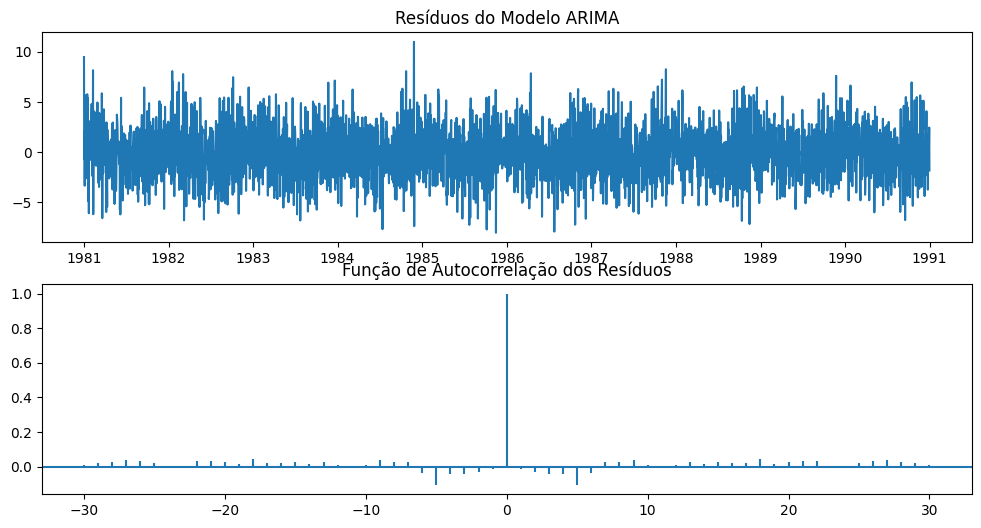

In [40]:
residuals = arima_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Resíduos do Modelo ARIMA')

plt.subplot(212)
plt.acorr(residuals, maxlags=30, label='Autocorrelação dos Resíduos')
plt.title('Função de Autocorrelação dos Resíduos')
plt.show()


# 4.1.2 Verificar Normalidade dos Resíduos:

 * Histograma e Q-Q Plot: Plote o histograma dos resíduos e o Q-Q plot para verificar a normalidade.

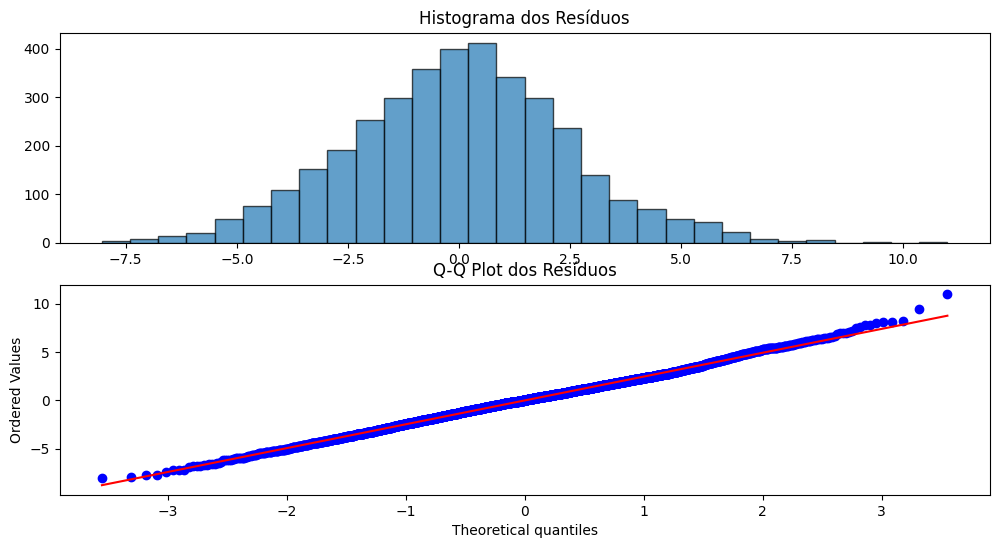

In [41]:
from scipy import stats

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma dos Resíduos')

plt.subplot(212)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()


4.1.3 Ajustar o Modelo:

* Experimentar Diferentes Parâmetros: Tente diferentes valores para p,d e qpara encontrar o melhor ajuste. Utilize critérios de informação como AIC e BIC para comparar modelos.

* Modelos Alternativos: Considere modelos alternativos como SARIMA ou SARIMAX se houver componentes sazonais ou se você tiver variáveis exógenas que podem melhorar a previsão.

4.1.4 Realizar Previsões:

* Previsão Futura: Com o modelo ajustado, faça previsões e avalie o desempenho do modelo com os dados de validação (se disponíveis).

C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


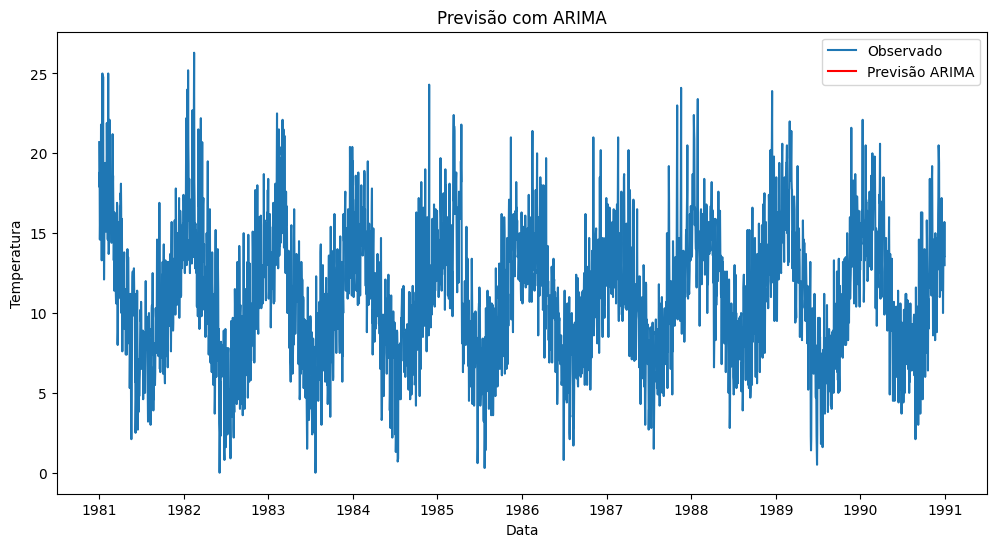

In [42]:
# Previsão com o modelo ARIMA
forecast_arima = arima_fit.get_forecast(steps=30)
forecast_arima_index = pd.date_range(start=df_temperatura_cleaned.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_arima_df = pd.DataFrame(forecast_arima.predicted_mean, index=forecast_arima_index, columns=['Forecast'])

plt.figure(figsize=(12, 6))
plt.plot(df_temperatura_cleaned['Daily minimum temperatures in Melbourne'], label='Observado')
plt.plot(forecast_arima_df, label='Previsão ARIMA', color='red')
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Supondo que df_temperatura_cleaned já esteja definido e indexado por datas

# Especificar parâmetros do modelo SARIMA
# Exemplo de parâmetros sazonais:
# P = 1: Ordem do componente autorregressivo sazonal
# D = 1: Ordem da diferenciação sazonal
# Q = 1: Ordem do componente de média móvel sazonal
# s = 365: Periodicidade sazonal (por exemplo, sazonalidade anual para dados diários)
sarima_model = SARIMAX(
    df_temperatura_cleaned['Daily minimum temperatures in Melbourne'],
    order=(5, 0, 0),         # p, d, q (não sazonais)
    seasonal_order=(1, 1, 1, 365)  # P, D, Q, s (sazonais)
)

# Ajustar o modelo SARIMA
sarima_fit = sarima_model.fit()

# Resumo do modelo SARIMA
print(sarima_fit.summary())

# Fazer previsões
forecast_sarima = sarima_fit.get_forecast(steps=30)
forecast_sarima_index = pd.date_range(start=df_temperatura_cleaned.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_sarima_df = pd.DataFrame(forecast_sarima.predicted_mean, index=forecast_sarima_index, columns=['Forecast'])

# Visualizar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df_temperatura_cleaned.index, df_temperatura_cleaned['Daily minimum temperatures in Melbourne'], label='Observado')
plt.plot(forecast_sarima_df.index, forecast_sarima_df['Forecast'], label='Previsão SARIMA', color='red')
plt.title('Previsão com SARIMA')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raisapedrotti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


4. Modelagem da Série Temporal
Modelo de Suavização Exponencial: Modelos como o método de Holt-Winters podem ser usados para capturar tendências e sazonalidades.

Modelos ARIMA (AutoRegressive Integrated Moving Average): ARIMA é útil para modelar séries temporais não estacionárias e pode lidar com tendências e autocorrelações.

Modelos SARIMA (Seasonal ARIMA): Extensão do ARIMA que inclui componentes sazonais.

Modelos de Suavização: Como a média móvel ou a suavização exponencial para capturar padrões mais simples.

Modelos de Estado Espacial e Filtros de Kalman: Usados para situações mais complexas onde outras abordagens podem não ser adequadas.

5. Avaliação do Modelo
Divisão dos Dados: Divida os dados em conjuntos de treino e teste para avaliar o desempenho do modelo.

Erro de Previsão: Avalie o modelo usando métricas como Erro Absoluto Médio (MAE), Erro Quadrático Médio (RMSE), ou Métrica de Informação de Akaike (AIC) para modelos ARIMA.

Resíduos: Analise os resíduos (diferença entre os valores reais e previstos) para verificar se há padrões remanescentes ou autocorrelações.

6. Previsão
Gerar Previsões: Use o modelo ajustado para fazer previsões futuras com base nas observações passadas.

Intervalos de Confiança: Forneça intervalos de confiança para as previsões para avaliar a incerteza.

7. Revisão e Ajuste
Revisão dos Resultados: Verifique se os resultados são razoáveis e consistentes com a teoria ou conhecimento do domínio.

Ajuste do Modelo: Se necessário, ajuste o modelo e repita a avaliação para melhorar a precisão das previsões.

Ferramentas e Software
Python: Bibliotecas como pandas, statsmodels, e prophet.
R: Pacotes como forecast, tseries, e ggplot2.
Excel: Pode ser usado para análises básicas e visualizações.
Conclusão
A análise de séries temporais é uma ferramenta poderosa para compreender e prever dados ao longo do tempo. Seguir esses passos ajudará a garantir que sua análise seja robusta e eficaz.